# Netflix Data Analysis
Findings from the data:
1) What is the most frequent Genre in the dataset ?
2) what Genre has Highest Votes ?
3) what movie got highest popularity ? what is its Genre ?
4) what movie got the lowest popularity ? what is its Genre ?
5) which year has the most filmmed movies ?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movie_data=pd.read_csv(r"C:\Users\yedla\Downloads\mymoviedb.csv",engine='python',on_bad_lines='skip')

In [3]:
movie_data

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [4]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [5]:
movie_data['Release_Date']=pd.to_datetime(movie_data['Release_Date'],errors='coerce')
movie_data['Vote_Count']=pd.to_numeric(movie_data['Vote_Count'],errors='coerce').astype('Int64')
movie_data['Vote_Average']=pd.to_numeric(movie_data['Vote_Average'],errors='coerce').astype('float')

In [6]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9826 non-null   Int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(2), object(5)
memory usage: 701.4+ KB


In [7]:
movie_data.isnull().sum()

Release_Date         10
Title                 9
Overview              9
Popularity           10
Vote_Count           11
Vote_Average         11
Original_Language    10
Genre                11
Poster_Url           11
dtype: int64

In [8]:
null_data=movie_data.isnull()
null_corr=null_data.corr()

In [9]:
print(null_corr)

                   Release_Date     Title  Overview  Popularity  Vote_Count  \
Release_Date           1.000000  0.948635  0.948635    0.899898    0.953414   
Title                  0.948635  1.000000  1.000000    0.948635    0.904442   
Overview               0.948635  1.000000  1.000000    0.948635    0.904442   
Popularity             0.899898  0.948635  0.948635    1.000000    0.953414   
Vote_Count             0.953414  0.904442  0.904442    0.953414    1.000000   
Vote_Average           0.953414  0.904442  0.904442    0.953414    1.000000   
Original_Language      0.899898  0.948635  0.948635    1.000000    0.953414   
Genre                  0.953414  0.904442  0.904442    0.953414    1.000000   
Poster_Url             0.953414  0.904442  0.904442    0.953414    1.000000   

                   Vote_Average  Original_Language     Genre  Poster_Url  
Release_Date           0.953414           0.899898  0.953414    0.953414  
Title                  0.904442           0.948635  0.90444

In [10]:
movie_data=movie_data.dropna()

In [11]:
movie_data.isnull().sum()

Release_Date         0
Title                0
Overview             0
Popularity           0
Vote_Count           0
Vote_Average         0
Original_Language    0
Genre                0
Poster_Url           0
dtype: int64

In [12]:
movie_data=movie_data.drop(['Overview','Original_Language','Poster_Url'],axis=1)

In [13]:
movie_data

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,8.3,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,8.1,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,6.3,Thriller
3,2021-11-24,Encanto,2402.201,5076,7.7,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,7.0,"Action, Adventure, Thriller, War"
...,...,...,...,...,...,...
9832,1973-10-15,Badlands,13.357,896,7.6,"Drama, Crime"
9833,2020-10-01,Violent Delights,13.356,8,3.5,Horror
9834,2016-05-06,The Offering,13.355,94,5.0,"Mystery, Thriller, Horror"
9835,2021-03-31,The United States vs. Billie Holiday,13.354,152,6.7,"Music, Drama, History"


In [14]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9826 entries, 0 to 9836
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  9826 non-null   datetime64[ns]
 1   Title         9826 non-null   object        
 2   Popularity    9826 non-null   float64       
 3   Vote_Count    9826 non-null   Int64         
 4   Vote_Average  9826 non-null   float64       
 5   Genre         9826 non-null   object        
dtypes: Int64(1), datetime64[ns](1), float64(2), object(2)
memory usage: 547.0+ KB


In [15]:
movie_data.describe()

,Release_Date,Popularity,Vote_Count,Vote_Average
count,9826,9826.000000,9826.0,9826.000000
mean,2006-09-23 04:47:14.276409600,40.323951,1392.943721,6.439467
min,1902-04-17 00:00:00,13.354000,0.0,0.000000
25%,2000-10-17 12:00:00,16.128250,146.0,5.900000
50%,2011-09-12 00:00:00,21.195000,444.0,6.500000
75%,2017-11-22 00:00:00,35.179250,1376.0,7.100000
max,2024-07-03 00:00:00,5083.954000,31077.0,10.000000
std,NaN,108.879332,2611.303856,1.129797


## Converting Numbered data to labels
categorizing the Vote_Average column into 4 categories so that we can can conclude the majority of the movies are under which category

In [16]:
def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    
    df[col]=pd.cut(df[col],edges,labels=labels,duplicates='drop')
    return df

In [17]:
labels=['not_popular','below_avg','average','popular']
categorize_col(movie_data,'Vote_Average',labels)
movie_data['Vote_Average'].unique()

['popular', 'below_avg', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'below_avg' < 'average' < 'popular']

In [18]:
movie_data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,popular,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,below_avg,Thriller
3,2021-11-24,Encanto,2402.201,5076,popular,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [19]:
movie_data['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
popular        2450
average        2411
below_avg      2398
Name: count, dtype: int64

In [20]:
movie_data.dropna(inplace=True)
movie_data.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [21]:
movie_data = movie_data.dropna(subset=['Genre'])
movie_data['Genre'] = movie_data['Genre'].str.split(', ')
movie_data = movie_data.explode('Genre').reset_index(drop=True)


In [22]:
movie_data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,popular,Crime
4,2022-03-01,The Batman,3827.658,1151,popular,Mystery


In [23]:
movie_data['Release_Date']=movie_data['Release_Date'].dt.year

In [24]:
movie_data.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction
3,2022,The Batman,3827.658,1151,popular,Crime
4,2022,The Batman,3827.658,1151,popular,Mystery


In [25]:
movie_data['Genre']=movie_data['Genre'].astype('category')
movie_data['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [26]:
movie_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Release_Date  25551 non-null  int32   
 1   Title         25551 non-null  object  
 2   Popularity    25551 non-null  float64 
 3   Vote_Count    25551 non-null  Int64   
 4   Vote_Average  25551 non-null  category
 5   Genre         25551 non-null  category
dtypes: Int64(1), category(2), float64(1), int32(1), object(1)
memory usage: 774.5+ KB


In [27]:
movie_data.nunique()

Release_Date     100
Title           9414
Popularity      8087
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [28]:
movie_data['Genre'].describe()

count     25551
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

### what is the most frequent Genre in the dataset ?

Text(0.5, 1.0, 'Genre column distribution')

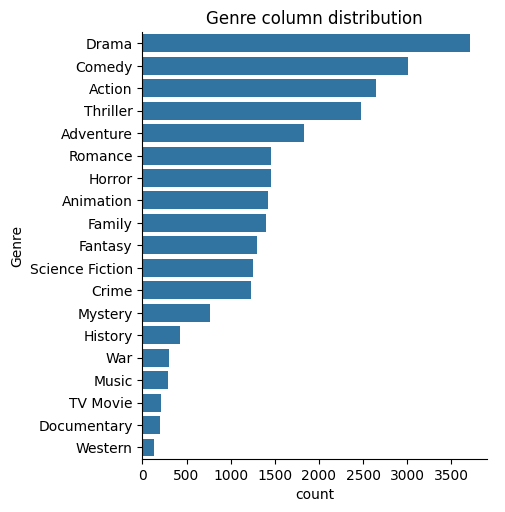

In [29]:
sns.catplot(y=movie_data['Genre'],kind='count',order=movie_data['Genre'].value_counts().index)
plt.title('Genre column distribution')

From the above plot, the most frequent genre in the dataset i.e most of the movies are of genre 'Drama' and the least is Western.

## which Genre has highest Votes?
from the above plot it is clear that the genre 'Drama' has highest nunmber of votes with a acount of around 3500+.

In [30]:
movie_data['Vote_Average'].value_counts()

Vote_Average
average        6612
popular        6520
below_avg      6348
not_popular    6071
Name: count, dtype: int64

Text(0.5, 1.0, 'Vote Average Analysis')

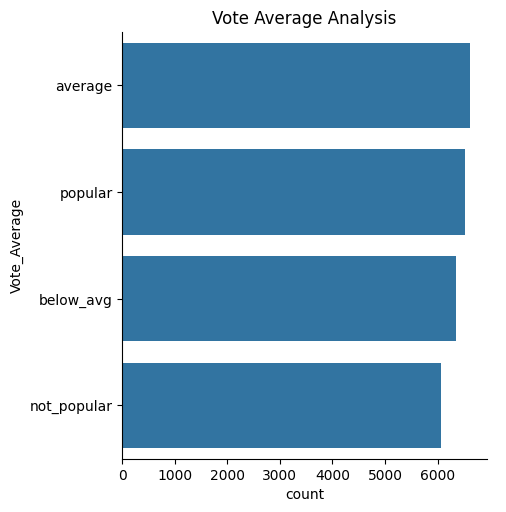

In [31]:
sns.catplot(y=movie_data['Vote_Average'],kind='count',order=movie_data['Vote_Average'].value_counts().index)
plt.title('Vote Average Analysis')

## what movie got highest popularity ? what is its Genre ?

In [32]:
movie_data[movie_data['Popularity']==movie_data['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


The movie Spider-Man: No way Home got the highest popularity with a count 5083.954 and the genre of the movie also obtained

## what movie got lowest popularity ? what is its Genre ?

In [33]:
movie_data[movie_data['Popularity']==movie_data['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25545,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25547,2021,The United States vs. Billie Holiday,13.354,152,average,History
25548,1984,Threads,13.354,186,popular,War
25549,1984,Threads,13.354,186,popular,Drama
25550,1984,Threads,13.354,186,popular,Science Fiction


From the above we see the movie which got least popularity along with its genre

<Axes: xlabel='Release_Date', ylabel='Count'>

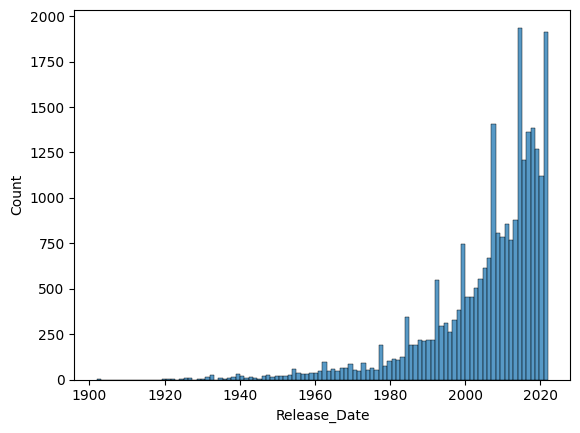

In [34]:
sns.histplot(x=movie_data['Release_Date'])

## which year has the most filmmed movies ?

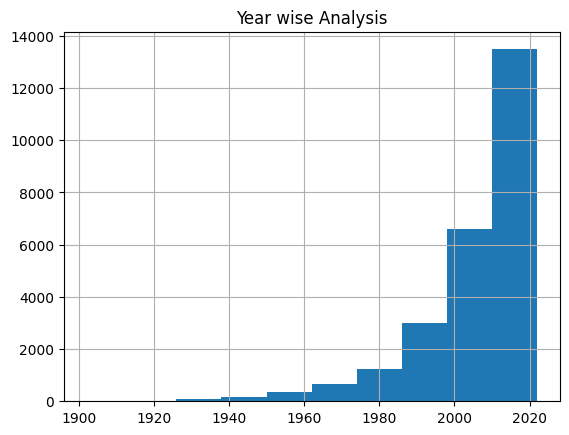

In [35]:
movie_data['Release_Date'].hist()
plt.title('Year wise Analysis')
plt.show()

From the plot the year with most fimmed 